#Format Data for Experiment in ABM environment

In [1]:
#Import Packages
#Needed for moving to output
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as pl
import itertools
from collections import Counter
import pickle

from vivarium.library.units import units, remove_units
from tumor_tcell.library.phylogeny import get_phylogeny
from tumor_tcell.experiments.main import plots_suite


#Analysis tumor-tcell modules needed
from tumor_tcell.library.data_process import data_to_dataframes
from tumor_tcell.library.data_process import control_data_to_dataframes
from tumor_tcell.library.population_analysis import division_analysis
from tumor_tcell.library.population_plots import population_plot
from tumor_tcell.library.population_plots import division_plot
from tumor_tcell.library.population_plots import death_plot

Loading chipmunk for Linux (64bit) [/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/vivarium_env/lib/python3.8/site-packages/pymunk/libchipmunk.so]


In [2]:
#Read in the data from parent directory
analysis_dir = '/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/'
experiment_id = 'tumor_tcell_20210602.165444/'
experiment_dir = analysis_dir+experiment_id
os.chdir(experiment_dir)
figures_out_dir = experiment_dir + 'figures'
os.makedirs(figures_out_dir, exist_ok=True)
os.getcwd()

'/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/out/analysis/tumor_tcell_20210602.165444'

In [3]:
file_to_read = open("data_export.pkl", "rb")
data = pickle.load(file_to_read)
data;

In [4]:
#Write sim_config description to txt file
config_to_read = open("config_export.pkl", "rb")
sim_config = pickle.load(config_to_read)
config_file = open("sim_config.txt", "wt")
n = config_file.write(sim_config)
config_file.close()
print(sim_config)

n_tcells: 12 
n_tumors: 1200 
tumors_state_PDL1n: 0.5 
tcells_state_PD1n:0.8 
total_time:259200 
time_step:60 
sim_step:6000 
bounds:[<Quantity(1200, 'micrometer')>, <Quantity(1200, 'micrometer')>] 
n_bins:[120, 120] 
halt_threshold:5000 
tumors_distance:260 micrometer 
tcell_distance: None 



## Single Cell

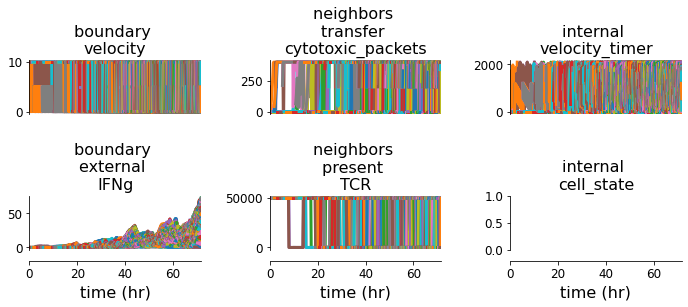

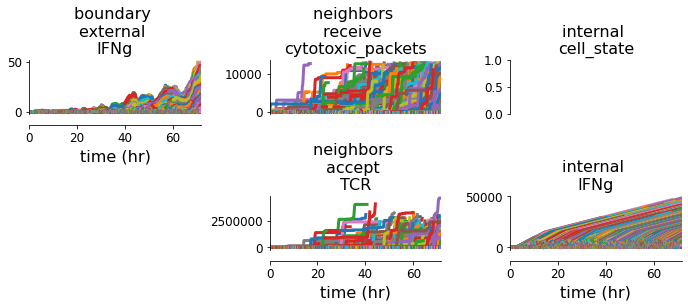

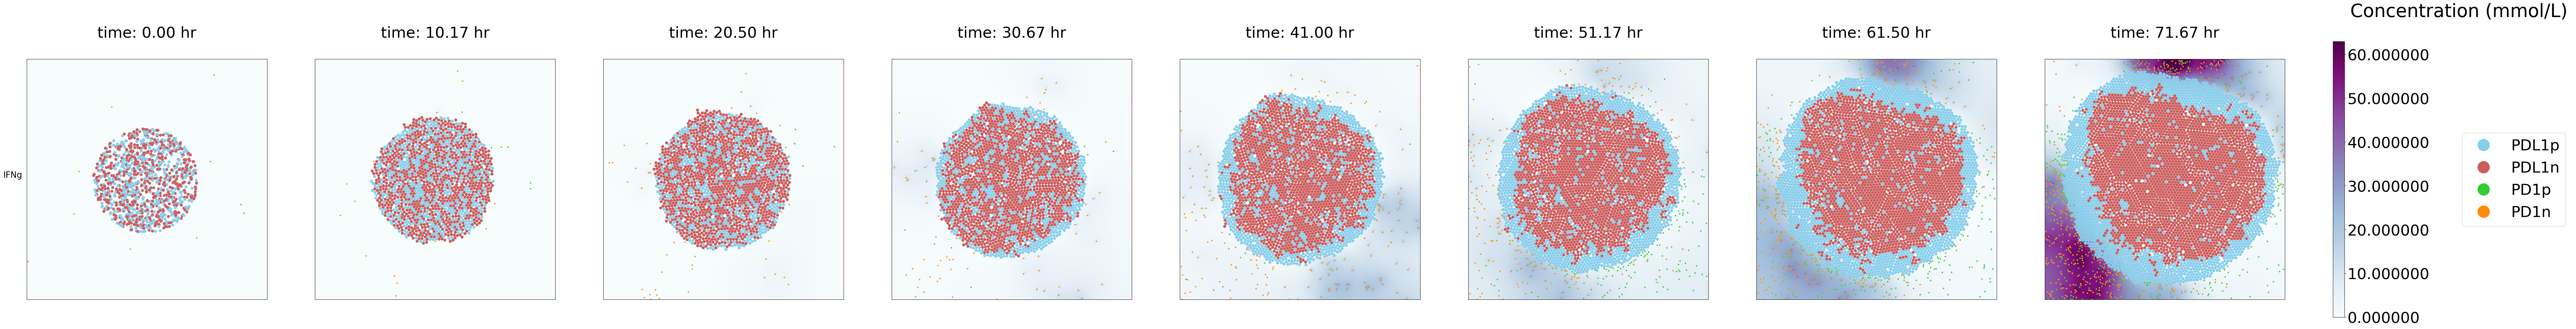

In [5]:
# #Plot the data using tumor-tcell experiment notebook and save in current directory
bounds = [1200,1200]
fig1, fig2, fig3 = plots_suite(data, out_dir = figures_out_dir, bounds=[b*units.um for b in bounds])

## Population Level

In [6]:
df_tumor_death, df_tcell_death, tumor_plot, tcell_plot = data_to_dataframes(data)

/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcell_death.sort_values(by=['time'], inplace=True)
/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tcell_death[death_type] = df_tcell_death['death'].apply(lambda x: 1 if x == death_type else 0)
/mnt/c/Users/akoya-stanford/Python_Code/tumor-tcell/tumor_tcell/library/data_process.py:131: SettingWithCopyWarning: 
A value is trying to 

In [7]:
divide_time_T = division_analysis(tcell_plot)

In [8]:
divide_time_tumor = division_analysis(tumor_plot)

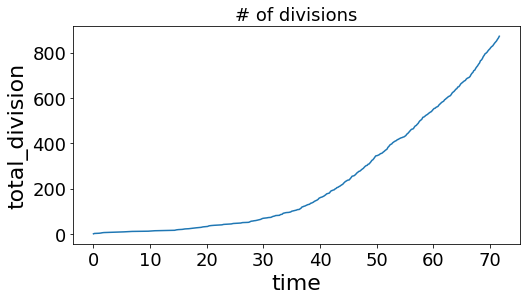

In [9]:
division_plot(divide_data = divide_time_T, out_dir = figures_out_dir, save_name='Tcells')

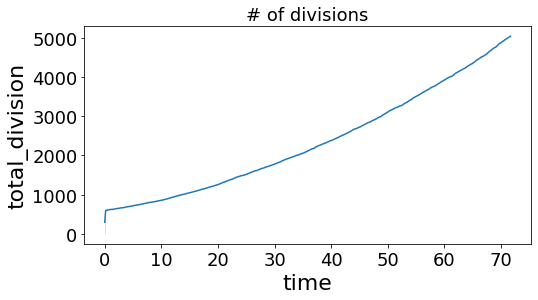

In [10]:
division_plot(divide_data = divide_time_tumor, out_dir = figures_out_dir, save_name='Tumors')

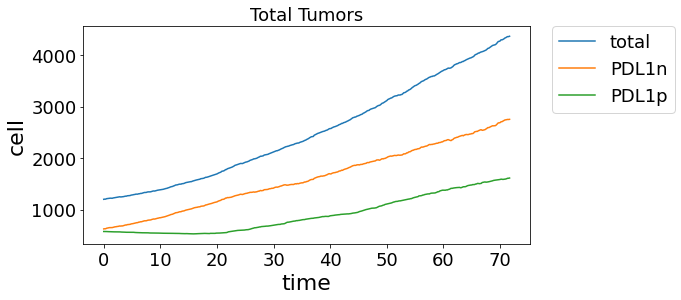

In [11]:
population_plot(population_data = tumor_plot, cell_states = ['PDL1n','PDL1p'], out_dir=figures_out_dir, save_name='Tumors')

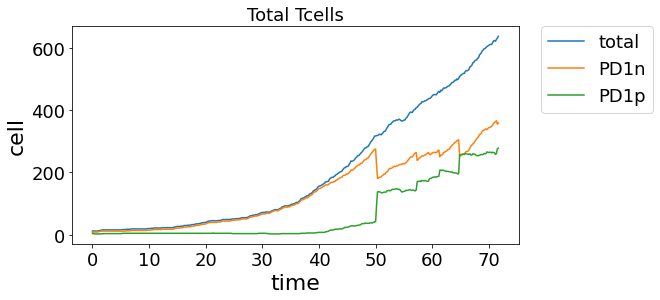

In [12]:
population_plot(population_data = tcell_plot, cell_states = ['PD1n','PD1p'], out_dir=figures_out_dir, save_name='Tcells')

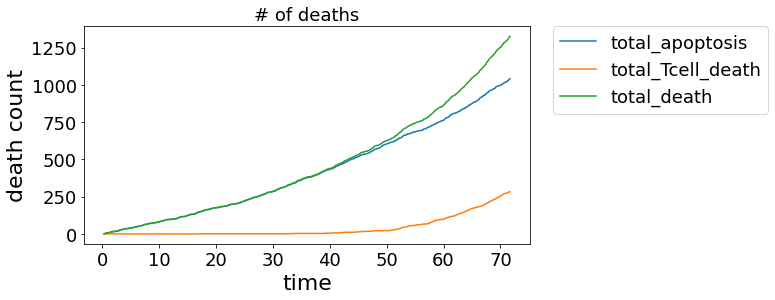

In [13]:
death_plot(death_data = df_tumor_death, out_dir=figures_out_dir, save_name='Tumors')

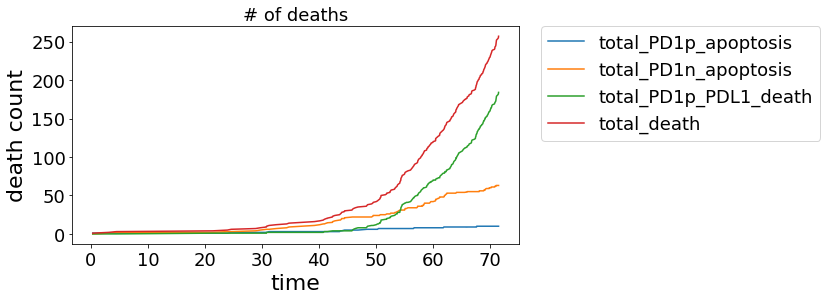

In [14]:
death_plot(death_data = df_tcell_death, out_dir=figures_out_dir, save_name='Tcells')

In [15]:
#Export the dataframes for analysis comparison to other experiments and not need to process again
df_tumor_death['experiment_id'] = experiment_id
df_tcell_death['experiment_id'] = experiment_id
tumor_plot['experiment_id'] = experiment_id
tcell_plot['experiment_id'] = experiment_id

df_tumor_death.to_csv('tumor_death.csv')
df_tcell_death.to_csv('tcell_death.csv')
tumor_plot.to_csv('tumor_plot.csv')
tcell_plot.to_csv('tcell_plot.csv')

# If No T cells

In [16]:
# #use this function
# df_tumor_death, tumor_plot = control_data_to_dataframes(data)